In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [4]:
data=pd.read_csv("fashion-mnist_test.csv")
data
feature=data.drop("label",axis=1)
x=[]
for i in range(len(feature)):
    x.append(np.array(feature.iloc[i]).reshape(28,28)/255)
feature=np.array(x)
label=np.array(data["label"])
print(label,feature.shape)


[0 1 2 ... 8 8 1] (10000, 28, 28)


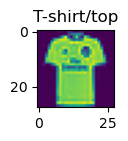

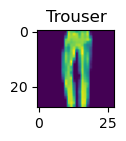

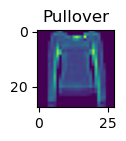

In [71]:
typ=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
for i in range(3):
    plt.figure(figsize=(4,1))
    plt.imshow(x[i])
    plt.title(typ[i])
   
    plt.show()

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.2,random_state=42)
print(type(xtrain))

<class 'numpy.ndarray'>


In [7]:
model = Sequential([
    Conv2D(filters=50,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(500,activation="relu"),
    Dense(50,activation="relu"),
    Dense(10, activation='sigmoid') 
])

C:\Users\Himangshu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9060 - loss: 0.2397
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9367 - loss: 0.1770
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.9438 - loss: 0.1581
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9589 - loss: 0.1144
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9669 - loss: 0.0932


In [63]:
model.evaluate(xtest,ytest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8861 - loss: 0.4109


[0.39609575271606445, 0.8830000162124634]

In [50]:
ypredict=model.predict(xtest)
y=[]
for i in ypredict:
    y.append(np.argmax(i))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


tested   :[192, 192, 212, 205, 204, 193, 200, 206, 196, 200]
predicted:[218, 190, 244, 223, 210, 211, 128, 203, 186, 187]


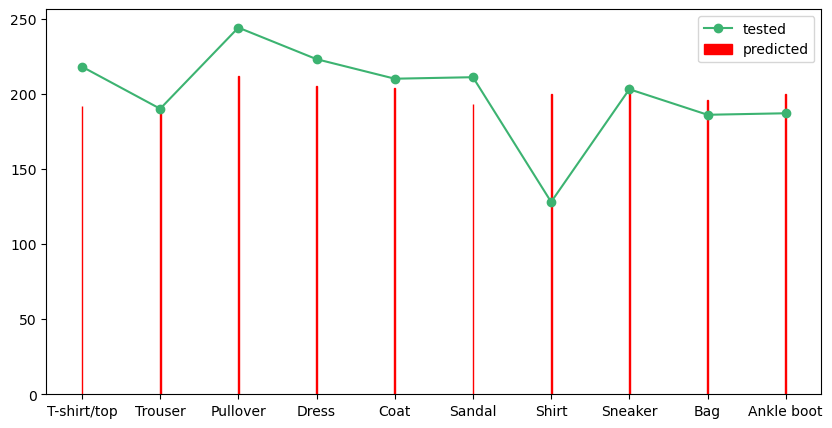

In [64]:
c=[]
c1=[]
for i in range(10):
    c.append(list(ytest).count(i))
    c1.append(y.count(i))
print(f"tested   :{c}\npredicted:{c1}")
plt.figure(figsize=(10,5))
plt.plot(typ,c1,label="tested",color='mediumseagreen',marker="o")
plt.bar(typ,c,color='red', edgecolor="red",width=.01,label="predicted")
plt.legend()